<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> My first IVP </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.03</h2>
</center>

<div id='toc' />

## Table of Contents

* [My first IVP](#myfirstivp)
* [Acknowledgements](#acknowledgements)

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt # type: ignore
from matplotlib import pyplot # type: ignore
import numpy as np # type: ignore

from scipy.integrate import solve_ivp # type: ignore
from scipy import optimize # type: ignore 
from pylab import * # type: ignore
from numpy import linalg as LA # type: ignore
from matplotlib.legend_handler import HandlerLine2D # type: ignore
from scipy.linalg import toeplitz # type: ignore
from scipy.optimize import root # type: ignore
from ipywidgets import interact, RadioButtons, Checkbox # type: ignore
import sympy as sym # type: ignore
import matplotlib as mpl # type: ignore
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from mpl_toolkits.axes_grid1 import make_axes_locatable # type: ignore
sym.init_printing()


<div id='IVP' />

# Initial Value Problems
[Back to TOC](#toc)

The following is a basic definition of an IVP:
$$ 
\begin{align*}
    \dot{y}(t) &= f(t,y(t)), \quad t\in]t_0,T],\\
    y(t_0) & = y_0.
\end{align*}
$$


<div id='solver' />

# Four solvers: One step version
[Back to TOC](#toc)

- **Euler's Method**:
$$
\begin{align*}
    y_{i+1} &= y_i + h\,f(t_i,y_i)
\end{align*}
$$

- **Backward Euler Method**:
$$
\begin{align*}
    y_{i+1} &= y_i + h\,f(t_i+h,y_{i+1})
\end{align*}
$$

- **Runge-Kutta of second order (RK2)**:
$$
\begin{align*}
    k_{1} &= f(t_i,y_i) \\
    y_{i+1} &= y_i + h\,f\left(t_i + \dfrac{h}{2}, y_i + \dfrac{h}{2}\,k_1\right)
\end{align*}
$$

- **Runge-Kutta of 4th order (RK4)**:
$$
\begin{align*}
    k_{1} &= f(t_i,y_i) \\
    k_{2} &= f(t_i + \dfrac{h}{2}, y_i + \dfrac{h}{2}k_1) \\
    k_{3} &= f(t_i + \dfrac{h}{2}, y_i + \dfrac{h}{2}k_2) \\
    k_{4} &= f(t_i + h, y + h\,k_3) \\
    y_{i+1} &= y_i + \dfrac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) 
\end{align*}
$$

## One Step Implementation

In [2]:
# Forward Euler Method
def eulerMethod_one_step(yi,ti,f,h):
    return yi+h*f(ti,yi)

# Backward Euler for 1D and nD problems
def backwardEuler_one_step(yi,ti,f,h):
    f_hat = lambda x:  x - yi - f(ti+h,x)*h
    if isinstance(yi,(int,float)):
        out = optimize.root_scalar(f_hat,x0=yi)
        if out.converged:
            return out.root
        else:
            raise Exception("Backward Euler 1D: We couldn't find the root. Select/build another solver.")
    else:
        out = optimize.root(f_hat,yi)
        if out.success:
            return out.x
        else:
            raise Exception("Backward Euler nD: We couldn't find the root. Select/build another solver.")

# Runge-Kutta of Second order
def RK2_one_step(yi,ti,f,h):
    k1=f(ti,yi)
    return yi+h*f(ti+h/2.0,yi+h/2.0*k1)

# Runge-Kutta 
def RK4_one_step(yi,ti,f,h):
    k1=f(ti,yi)
    k2=f(ti+h/2.0,yi+(h/2.0)*k1)
    k3=f(ti+h/2.0,yi+(h/2.0)*k2)
    k4=f(ti+h,yi+h*k3)
    return yi+(h/6.0)*(k1+2.0*k2+2.0*k3+k4)

## All Steps Implementation

In [3]:
def eulerMethod(t0,T,N,y0,f):
    t = np.linspace(t0,T,N+1)
    h = (T-t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N+1)
    else:
        y = np.zeros((N+1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = eulerMethod_one_step(y[i],t[i],f,h)
    return t, y

def backwardEulerMethod(t0,T,N,y0,f):
    t = np.linspace(t0,T,N+1)
    h = (T-t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N+1)
    else:
        y = np.zeros((N+1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = backwardEuler_one_step(y[i],t[i],f,h)
    return t, y

def RK2(t0,T,N,y0,f):
    t = np.linspace(t0,T,N+1)
    h = (T-t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N+1)
    else:
        y = np.zeros((N+1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = RK2_one_step(y[i],t[i],f,h)
    return t, y

def RK4(t0,T,N,y0,f):
    t = np.linspace(t0,T,N+1)
    h = (T-t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N+1)
    else:
        y = np.zeros((N+1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = RK4_one_step(y[i],t[i],f,h)
    return t, y

<div id='myfirstivp' />

# My first IVP - The ODE
[Back to TOC](#toc)

$$
\begin{align*}
    \dot{y}(t) &= \dfrac{1}{2}\,y(t), \quad t\in]0,10],&& \leftarrow \textrm{The equation/model and its domain},\\
    y(0) &= 1, && \leftarrow \textrm{The initial condition}.
\end{align*}
$$

# My first IVP - Theoretical Analysis
We first begin by solving the ODE algebraically,
$$
\begin{align*}
    \dot{y}(t) &= \dfrac{1}{2}\,y(t), && \textrm{moving $y(t)$ to the LHS.}\\
    \dfrac{1}{y(t)}\,\dfrac{\textrm{d}y}{\textrm{d}t}(t) &= \dfrac{1}{2},  && \textrm{re-writing $\dot{y}(t)$ as $\dfrac{\textrm{d}y}{\textrm{d}t}(t)$, and integrating.}\\
    \int \dfrac{1}{y(t)}\,\dfrac{\textrm{d}y}{\textrm{d}t}(t) \mathrm{d}t &= \int \dfrac{1}{2}\mathrm{d}t,\\
    \int \dfrac{1}{y}\,\textrm{d}y  &= \int \dfrac{1}{2}\mathrm{d}t,\\
    \log\left(y\right) &= \dfrac{t}{2}+C, && \textrm{solving for $y(t)$.}\\
    y(t) &= \exp\left(\dfrac{t}{2}+C\right), && \textrm{applying the initial condition $y(0) = 1$.}\\
    y(t) &= \exp\left(\dfrac{t}{2}\right), && \textrm{the ``algebraic'' solution.}\\
\end{align*}
$$
Thus, we now can compare any **numerical approximation** with the **algebraic solution**.

Now, we will compute one step of the **numerical approximation** for the previous ODE using the Euler's method, Backward Euler Method and RK2.

We consider $h=\dfrac{1}{2}$, $t_0=0$, $t_1=t_0+h=\dfrac{1}{2}$, $y_0=1$ (initial condition), and $f(t,y)=\dfrac{y}{2}$ (from the definition of the ODE).

## One step for "My First IVP" - **Euler's method**
Euler method is the following:
$$
    y_{i+1} = y_i + h\,f(t_i,y_i)
$$
Thus,
$$
\begin{align*}
    y_1 &= y_0+h\,f(t_0,y_0),\\
        &= y_0 + h\,\dfrac{y_0}{2},\\
        &= 1 + h\,\dfrac{1}{2},\\
        &= 1 + \dfrac{1}{2}\,\dfrac{1}{2},\\
    y_1 &= \dfrac{5}{4}.\\
\end{align*}
$$
Now, we can compare it to the **algebraic solution**.
$$
\begin{align*}
    \textrm{Error}_{\textrm{Euler}} 
        &= \left| y_1 - \exp\left(\dfrac{t_1}{2}\right)\right|\\
        &= \left| \dfrac{5}{4} - \exp\left(\dfrac{1/2}{2}\right)\right|\\
        &= \left| \dfrac{5}{4} - \exp\left(\dfrac{1}{4}\right)\right|\\
        &\approx \left| 1.25 - 1.28402541668774\right|\\
        &\approx 0.0340254166877414.
\end{align*}
$$


## One step for "My First IVP" - **Backward Euler method**
Backward Euler method is the following:
$$
    y_{i+1} = y_i + h\,f(t_i+h,y_{i+1})
$$
Thus,
$$
\begin{align*}
    y_1 &= y_0+h\,f(t_1,y_1),\\
    y_1 &= y_0 + h\,\dfrac{y_1}{2},\\
    y_1 - h\,\dfrac{y_1}{2}&= y_0,\\
    y_1\,\left(1 - \dfrac{h}{2}\right)&= y_0,\\
    y_1 &= \dfrac{y_0}{1 - \dfrac{h}{2}},\\
        &= \dfrac{1}{1 - \dfrac{1/2}{2}},\\
        &= \dfrac{1}{1 - \dfrac{1}{4}},\\
    y_1 &\approx 1.33333333333333. 
\end{align*}
$$

Now, we can compare it to the **algebraic solution**.
$$
\begin{align*}
    \textrm{Error}_{\textrm{Backward Euler}} 
        &= \left| y_1 - \exp\left(\dfrac{t_1}{2}\right)\right|\\
        &\approx \left| 1.33333333333333 - \exp\left(\dfrac{1}{4}\right)\right|\\
        &\approx \left| 1.33333333333333 - 1.28402541668774\right|\\
        &\approx 0.0493079166455919.
\end{align*}
$$

## One step for "My First IVP" - **RK2**
Backward Euler method is the following:
$$
\begin{align*}
    k_{1} &= f(t_i,y_i) \\
    y_{i+1} &= y_i + h\,f\left(t_i + \dfrac{h}{2}, y_i + \dfrac{h}{2}\,k_1\right)
\end{align*}
$$
Thus,
$$
\begin{align*}
    k_1 &= f(t_0,y_0) = \dfrac{y_0}{2} = \dfrac{1}{2}.\\
    y_1 &= y_0 + h\,f\left(t_0+\dfrac{h}{2},y_0 + \dfrac{h}{2}\,k_1\right),\\
        &= 1 + \dfrac{1}{2}\,f\left(0+\dfrac{1}{4},1 + \dfrac{1}{4}\,\dfrac{1}{2}\right),\\
        &= 1 + \dfrac{1}{2}\,f\left(\dfrac{1}{4},\dfrac{9}{8}\right),\\
        &= 1 + \dfrac{1}{2}\,\dfrac{\frac{9}{8}}{2},\\
        &= 1 + \dfrac{1}{2}\,\frac{9}{16},\\
        &= 1 + \frac{9}{32},\\
        &= \frac{41}{32},\\
    y_1 &= 1.28125.
\end{align*}
$$

Now, we can compare it to the **algebraic solution**.
$$
\begin{align*}
    \textrm{Error}_{\textrm{RK2}} 
        &= \left| y_1 - \exp\left(\dfrac{t_1}{2}\right)\right|\\
        &\approx \left| 1.28125. - \exp\left(\dfrac{1}{4}\right)\right|\\
        &\approx \left| 1.28125. - 1.28402541668774\right|\\
        &\approx 0.00277541668774139.
\end{align*}
$$

## Conclusions of the Theoretical Analysis
- The error for the Euler's method and Backward Euler method are comparable.
- The error for RK2 is much smaller than Euler's method and the Backward Euler method.

**Challenge:** _Could you do the one-step computation for RK4?_

# My First IVP - Numerical Analysis
Now, we will solve the problem numerically.

For completeness, we repeat here the ODE under study.
$$
\begin{align*}
    \dot{y}(t) &= \dfrac{1}{2}\,y(t), \quad t\in]0,10],&& \leftarrow \textrm{The equation/model and its domain},\\
    y(0) &= 1, && \leftarrow \textrm{The initial condition}.
\end{align*}
$$

Now, we implement the **numerical solution** for _several time steps_.

In [4]:
# Defining 'f'
f = lambda t,y: y/2

# Defining 't'
T =10
t = np.linspace(0,T,21)

# Defining the output 'vector'
y = np.zeros(21)

# Setting up the initial condition
y[0] = 1

Solving it numerically with the Euler's method

In [5]:
# Setting up the h=\Delta t
h = 0.5

# Computing the approximation
for i in np.arange(20):
    ##################################################
    # Explicit implementation
    ##################################################
    y[i+1] = y[i]+ h*f(t[i],y[i])
    
    ##################################################
    # using One Step Implementation
    ##################################################
    # y[i+1] = eulerMethod_one_step(y[i],t[i],f,h)

Plotting the outcome

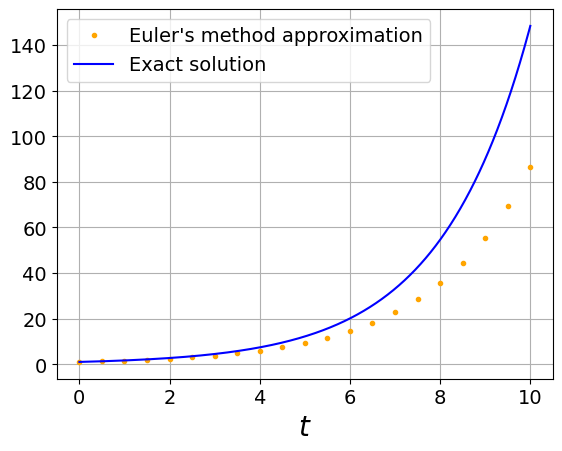

In [6]:
# The exact solution for this IVP. NOTICE: This is not possible in general, but it is possible for this case!
y_exact = lambda t: np.exp(t/2)
tt = np.linspace(0,T,1000)

plt.figure()
plt.plot(t,y,'.', color='orange', label='Euler\'s method approximation')
plt.plot(tt,y_exact(tt),'b-', label='Exact solution')
plt.xlabel(r'$t$')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# How can we improve this?
Consider a more general case,
$$
\begin{align*}
    \dot{y}(t) &= \alpha\,\,y(t), \quad t\in]0,10],&& \leftarrow \textrm{The equation/model and its domain},\\
    y(0) &= 1, && \leftarrow \textrm{The initial condition}.
\end{align*}
$$

In [7]:
def plot_all_solvers(N=20,alpha=0.5,flagBackwardEuler=False,flagRK2=False,flagRK4=False,flagError=False,flagConvergence=False):

    # Parameters for discrete approximation
    t0 = 0.
    T = 10.
    y0 = 1.
    f = lambda t,y: alpha*y
    
    # Time discretization for 'exact/continuous' solution
    tt = np.linspace(0,T,1000)
    y_exact = lambda t: np.exp(alpha*t)
    
    # Computing three different 'numerical approximations'
    t, y_euler = eulerMethod(t0,T,N,y0,f)
    if flagBackwardEuler:
       _, y_backward_euler = backwardEulerMethod(t0,T,N,y0,f) 
    if flagRK2:
        _, y_RK2 = RK2(t0,T,N,y0,f)
    if flagRK4:
        _, y_RK4 = RK4(t0,T,N,y0,f)
    
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.plot(tt,y_exact(tt),'-', color='blue', label='Exact solution')
    plt.plot(t,y_euler,'d', color='orange', label='Euler\'s method',markersize=8,alpha=0.7)
    if flagBackwardEuler:
        plt.plot(t,y_backward_euler,'x', color='purple', label='Back. Euler method',markersize=7,alpha=0.7) 
    if flagRK2:
        plt.plot(t,y_RK2,'s', color='green', label='RK2 method',markersize=6,alpha=0.7)
    if flagRK4:
        plt.plot(t,y_RK4,'.', color='red', label='RK4 method',markersize=5)
    plt.xlabel(r'$t$')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title(f'Num. Approx using N=%d'%(N+1))
   
    if flagError:
        plt.subplot(132)
        plt.semilogy(t,np.abs(y_euler-y_exact(t)),'.', color='orange', label='Error Euler\'s method',markersize=8,alpha=0.5)
        if flagBackwardEuler:
            plt.semilogy(t,np.abs(y_backward_euler-y_exact(t)),'.', color='purple', label='Back. Euler method',markersize=8,alpha=0.5) 
        if flagRK2:
            plt.semilogy(t,np.abs(y_RK2-y_exact(t)),'.', color='green', label='Error RK2 method',markersize=8,alpha=0.7)
        if flagRK4:
            plt.semilogy(t,np.abs(y_RK4-y_exact(t)),'.', color='red', label='Error RK4 method',markersize=8,alpha=0.7)
        plt.xlabel(r'$t$')
        plt.grid(True)
        plt.legend(loc='lower right')
        plt.title(f'Error over time using N=%d'%(N+1))
        
    if flagConvergence:
        Ns = np.logspace(1,4,5,dtype=int)
        hs = T/(Ns-1)
        y_euler_final_step = np.zeros_like(hs)
        if flagBackwardEuler:
            y_backward_euler_final_step = np.zeros_like(hs) 
        if flagRK2:
            y_RK2_final_step = np.zeros_like(hs)
        if flagRK4: 
            y_RK4_final_step = np.zeros_like(hs)
            
        for i, N in np.ndenumerate(Ns):
            _ , y_euler = eulerMethod(t0,T,N,y0,f)
            y_euler_final_step[i]=y_euler[-1]
            if flagBackwardEuler:
               _, y_backward_euler = backwardEulerMethod(t0,T,N,y0,f)
               y_backward_euler_final_step[i]=y_backward_euler[-1] 
            if flagRK2:
                _, y_RK2 = RK2(t0,T,N,y0,f)
                y_RK2_final_step[i]=y_RK2[-1]
            if flagRK4:
                _, y_RK4 = RK4(t0,T,N,y0,f)
                y_RK4_final_step[i]=y_RK4[-1]
        plt.subplot(133)
        plt.loglog(hs,np.abs(y_exact(T)-y_euler_final_step),'.', color='orange', label='Error Euler\'s method',markersize=8,alpha=0.5)
        if flagBackwardEuler:
            plt.loglog(hs,np.abs(y_exact(T)-y_backward_euler_final_step),'.', color='purple', label='Error Back. Euler method',markersize=8,alpha=0.5) 
        if flagRK2:
            plt.loglog(hs,np.abs(y_exact(T)-y_RK2_final_step),'.', color='green', label='Error RK2\'s method',markersize=8,alpha=0.5)
        if flagRK4:
            plt.loglog(hs,np.abs(y_exact(T)-y_RK4_final_step),'.', color='red', label='Error RK4\'s method',markersize=8,alpha=0.5)
        plt.xlabel(r'$h$')
        plt.grid(True)
        #plt.legend(loc='lower right')
        plt.title(r'$|y_N-y_{\text{exact}}(T)|$')
    plt.show()

Suggested numerical exploration for the parameters:
1. Observe the error and convergence for Euler's method
1. Observe the error and convergence for Euler's method and RK2
1. Observe the error and convergence for Euler's method, RK2 and RK4. What can you conclude?
1. Use $\alpha=-10$ and $N=20$. What is happening?
1. $\alpha=-10$, increase $N=20$. When does it improve?

In [8]:
interact(plot_all_solvers,N=(2,1000,1),alpha=(-10,2,0.1))

interactive(children=(IntSlider(value=20, description='N', max=1000, min=2), FloatSlider(value=0.5, descriptio…

<function __main__.plot_all_solvers(N=20, alpha=0.5, flagBackwardEuler=False, flagRK2=False, flagRK4=False, flagError=False, flagConvergence=False)>

In [9]:
def plot_all_solvers_error(N_euler=20, N_BackEuler=20, N_RK2=20, N_RK4=20, alpha=0.5):

    # Parameters for discrete approximation
    t0 = 0.
    T = 10.
    y0 = 1.
    f = lambda t,y: alpha*y
    
    # Time discretization for 'exact/continuous' solution
    tt = np.linspace(0,T,1000)
    y_exact = lambda t: np.exp(alpha*t)
    
    # Computing three different 'numerical approximations'
    t_euler, y_euler = eulerMethod(t0,T,N_euler,y0,f)
    t_back_euler, y_back_euler = backwardEulerMethod(t0,T,N_BackEuler,y0,f) 
    t_RK2, y_RK2 = RK2(t0,T,N_RK2,y0,f)
    t_RK4, y_RK4 = RK4(t0,T,N_RK4,y0,f)
    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(tt,y_exact(tt),'-', color='blue', label='Exact solution')
    plt.plot(t_euler,y_euler,'d', color='orange', label='Euler\'s method',markersize=8,alpha=0.5)
    plt.plot(t_back_euler,y_back_euler,'x', color='purple', label='Back. Euler\'s method',markersize=8,alpha=0.5)
    plt.plot(t_RK2,y_RK2,'s', color='green', label='RK2 method',markersize=6,alpha=0.5)
    plt.plot(t_RK4,y_RK4,'.', color='red', label='RK4 method',markersize=5,alpha=0.5)
    plt.xlabel(r'$t$')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title(f'Num. Approx')
   
    plt.subplot(122)
    plt.semilogy(t_euler,np.abs(y_euler-y_exact(t_euler)),'.', color='orange', label='Error Euler\'s method',markersize=8,alpha=0.5)
    plt.semilogy(t_back_euler,np.abs(y_back_euler-y_exact(t_back_euler)),'.', color='purple', label='Error Euler\'s method',markersize=8,alpha=0.5) 
    plt.semilogy(t_RK2,np.abs(y_RK2-y_exact(t_RK2)),'.', color='green', label='Error RK2 method',markersize=8,alpha=0.5)
    plt.semilogy(t_RK4,np.abs(y_RK4-y_exact(t_RK4)),'.', color='red', label='Error RK4 method',markersize=8,alpha=0.5)
    plt.xlabel(r'$t$')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title(f'Error over time')
    plt.show()

The purpose of this numerical experiment is to show that it is very computational convenient to use higher order methods in general since if will require less **computation** to obtain a much better numerical approximations.

Experiments:
1. How could count the number of operations used for each solver?
1. Consider N_RK4=20: **What values for N_euler and N_RK2 to have a comparable error?**
1. Consider N_RK4=100: **What values for N_euler and N_RK2 to have a comparable error?**
1. Consider N_RK4=500: **What values for N_euler and N_RK2 to have a comparable error?**

In [10]:
interact(plot_all_solvers_error,N_euler=(2,10000,1),N_BackEuler=(2,10000,1),N_RK2=(2,10000,1),N_RK4=(2,10000,1),alpha=(-10,2,0.1))

interactive(children=(IntSlider(value=20, description='N_euler', max=10000, min=2), IntSlider(value=20, descri…

<function __main__.plot_all_solvers_error(N_euler=20, N_BackEuler=20, N_RK2=20, N_RK4=20, alpha=0.5)>

<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)

- _Material originally created by professor  Claudio Torres_ (`ctorres@inf.utfsm.cl`) _ DI UTFSM. June 2024.
- _Update June 2024 - v1.01 - C.Torres_ : Adding second widget about computational cost and error.
- _Update June 2024 - v1.02 - C.Torres_ : Adding Backward Euler method and a **theoretical analysis** for the understanding of the numerical algorithms.
- _Update June 2024 - v1.03 - C.Torres_ : Extending Backward Euler method to nD problems.